In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
sleep_prod = pd.read_csv('sleep.csv') 
sleep_prod['average_prod'] = (sleep_prod['Productivity_HW']+sleep_prod['Productivity_PER'])/2
sleep_prod = sleep_prod[sleep_prod.Productivity_HW != 0].reset_index(drop=True)
sleep_prod

# sleep_prod.loc[(sleep_prod!=0).any(axis=1)]
# sleep_prod = sleep_prod[sleep_prod.line_race != 0]

,unit,na_item,geo\time,Country,Hours,Productivity_HW,Productivity_PER,average_prod
0,PC_EU27_2020_MPPS_CP,NLPR_HW,AT,Austria,7.183,117.4,114.5,115.95
1,PC_EU27_2020_MPPS_CP,NLPR_HW,BE,Belgium,7.300,137.9,129.0,133.45
2,PC_EU27_2020_MPPS_CP,NLPR_HW,BG,Bulgaria,7.150,48.8,50.8,49.80
3,PC_EU27_2020_MPPS_CP,NLPR_HW,HR,Croatia,7.233,60.2,71.6,65.90
4,PC_EU27_2020_MPPS_CP,NLPR_HW,CZ,Czechia,7.183,77.7,85.9,81.80
5,PC_EU27_2020_MPPS_CP,NLPR_HW,DK,Denmark,7.250,139.4,121.3,130.35
6,PC_EU27_2020_MPPS_CP,NLPR_HW,EE,Estonia,7.367,72.5,80.8,76.65
7,PC_EU27_2020_MPPS_CP,NLPR_HW,FI,Finland,7.500,108.0,110.6,109.30
8,PC_EU27_2020_MPPS_CP,NLPR_HW,FR,France (including Monaco),7.383,126.5,115.5,121.00
9,PC_EU27_2020_MPPS_CP,NLPR_HW,DE,Germany,7.233,121.9,104.6,113.25


In [13]:
import matplotlib.pyplot as plt

x=sleep_prod['Hours'].values
y=sleep_prod['Productivity_HW'].values

x = x.reshape(len(sleep_prod), 1)
y = y.reshape(len(sleep_prod), 1)

<AxesSubplot:>

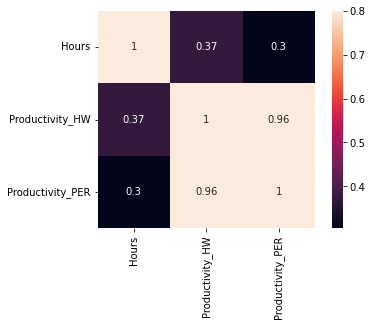

In [14]:
import seaborn as sb
sleep_corr = pd.DataFrame(sleep_prod['Hours'])
sleep_corr['Productivity_HW'] = sleep_prod['Productivity_HW']
sleep_corr['Productivity_PER'] = sleep_prod['Productivity_PER']
sb.heatmap(abs(sleep_corr.corr()), vmax = .8, square = True, annot = True)


In [15]:
%matplotlib inline

In [61]:
import plotly_express as px
labels = sleep_prod['Country']
fig = px.scatter(
    sleep_prod, x='Hours', y='Productivity_HW',
    color=labels,
    trendline="ols", trendline_scope="overall", trendline_color_override="black"
    )
fig.show()

In [62]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.139
Model:                            OLS   Adj. R-squared:                  0.109
Method:                 Least Squares   F-statistic:                     4.531
Date:                Tue, 19 Apr 2022   Prob (F-statistic):             0.0422
Time:                        08:47:23   Log-Likelihood:                -147.61
No. Observations:                  30   AIC:                             299.2
Df Residuals:                      28   BIC:                             302.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -705.8330    377.571     -1.869      0.072   -1479.251      67.585
x1           111.1626     52.224      2.129      0.042       4.187     218.138
==============================================================================
Omnibus:                        8.098   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                6.470
Skew:                           1.060   Prob(JB):                       0.0394
Kurtosis:                       3.825   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
results = px.get_trendline_results(fig)
results.px_fit_results.iloc[0].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.092
Model:                            OLS   Adj. R-squared:                  0.060
Method:                 Least Squares   F-statistic:                     2.851
Date:                Tue, 19 Apr 2022   Prob (F-statistic):              0.102
Time:                        08:44:56   Log-Likelihood:                -144.93
No. Observations:                  30   AIC:                             293.9
Df Residuals:                      28   BIC:                             296.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -483.4075    345.325     -1.400      0.173   -1190.774     223.959
x1            80.6490     47.764      1.688      0.102     -17.191     178.489
==============================================================================
Omnibus:                       23.158   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.098
Skew:                           1.812   Prob(JB):                     8.79e-09
Kurtosis:                       7.067   Cond. No.                         444.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [8]:
df_new = sleep_prod[['Hours']]
df_new


,Hours
Country,
Austria,7.183
Belgium,7.300
Bulgaria,7.150
Croatia,7.233
Czechia,7.183
Denmark,7.250
Estonia,7.367
Finland,7.500
France (including Monaco),7.383


In [10]:
df_new.to_csv('sleep_df.csv', index=True)